In [136]:
import pandas as pd
df=pd.read_csv(r"C:\Users\kbrad\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [138]:
#SPLIT LOWER AND UPPER BOUND OF STOREY
df[['storey_lower','storey_upper']]=df['storey_range'].str.split('TO',expand=True)

In [139]:
#SPLIT MONTH COLUMN
df[['resale_year','resale_month']]=df['month'].str.split('-',expand=True)

In [140]:
df['resale_year']=pd.to_numeric(df['resale_year'],errors='coerce')
df['resale_month']=pd.to_numeric(df['resale_month'],errors='coerce')
df['storey_lower']=pd.to_numeric(df['storey_lower'],errors='coerce')
df['storey_upper']=pd.to_numeric(df['storey_upper'],errors='coerce')
df['block']=pd.to_numeric(df['block'],errors='coerce')
df['block']=df['block'].fillna(df['block'].mode()[0])

In [142]:
df=df.drop('month',axis=1)

In [144]:
df=df.drop('storey_range',axis=1)

In [145]:
df.head(1)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_lower,storey_upper,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000,10,12,1990,1


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 287196 non-null  object 
 1   flat_type            287196 non-null  object 
 2   block                287196 non-null  float64
 3   street_name          287196 non-null  object 
 4   floor_area_sqm       287196 non-null  float64
 5   flat_model           287196 non-null  object 
 6   lease_commence_date  287196 non-null  int64  
 7   resale_price         287196 non-null  int64  
 8   storey_lower         287196 non-null  int64  
 9   storey_upper         287196 non-null  int64  
 10  resale_year          287196 non-null  int64  
 11  resale_month         287196 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 26.3+ MB


In [76]:
df.head(1)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_lower,storey_upper,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000,10,12,1990,01


In [147]:
df.isna().sum()

town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
storey_lower           0
storey_upper           0
resale_year            0
resale_month           0
dtype: int64

In [148]:
#Duplicates
df.duplicated().sum()

833

In [149]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

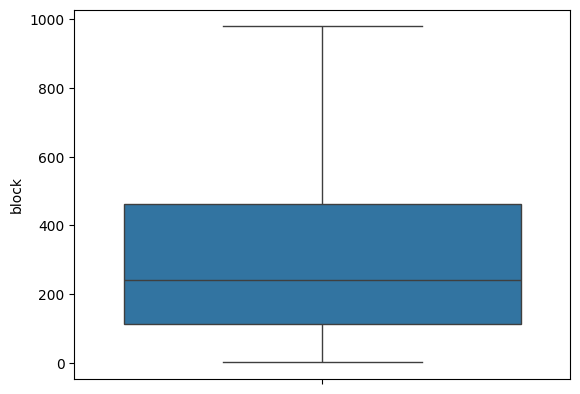

In [150]:
#Outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['block'])
plt.show()

In [ ]:
sns.boxplot(df['floor_area_sqm'])
plt.show()
sns.boxplot(df['resale_price'])
plt.show()
sns.boxplot(df['lease_commence_date'])
plt.show()

In [152]:
Q1=df['floor_area_sqm'].quantile(0.25)
Q3=df['floor_area_sqm'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
lower_bound,upper_bound

(0.5, 180.5)

In [153]:
df.floor_area_sqm=df.floor_area_sqm.clip(lower_bound,upper_bound)

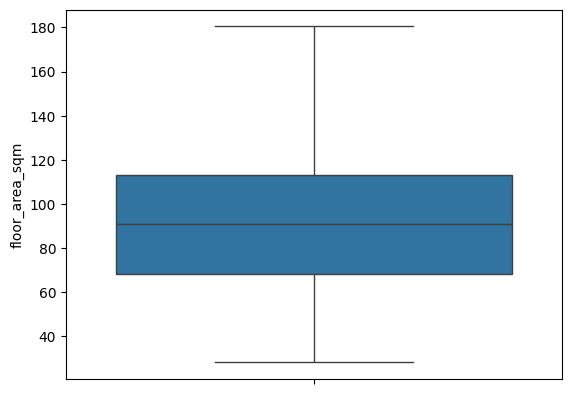

In [154]:
sns.boxplot(df['floor_area_sqm'])
plt.show()

In [155]:
Q1=df['resale_price'].quantile(0.25)
Q3=df['resale_price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
lower_bound,upper_bound

(-129500.0, 554500.0)

In [156]:
df.resale_price=df.resale_price.clip(lower_bound,upper_bound)

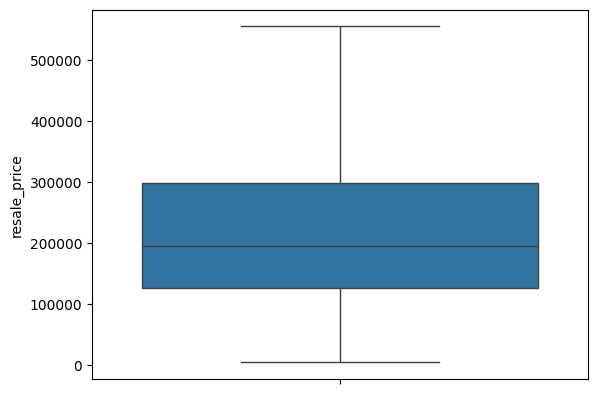

In [157]:
sns.boxplot(df['resale_price'])
plt.show()

In [ ]:
cols=df[[ 'flat_type', 'block', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'storey_lower','storey_upper', 'resale_year', 'resale_month']]
cols.corr()
sns.heatmap(cols.corr(),annot=True)
plt.show()

In [90]:
#Encoding categorical values
df1=df.copy()

In [91]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [92]:
category_mapping={'1 ROOM':1,'2 ROOM':2,'3 ROOM':3,'4 ROOM':4,'5 ROOM':5,'EXECUTIVE':6,'MULTI GENERATION':7}

#alter the column with mapped numbers
df1['flat_type']=df1['flat_type'].map(category_mapping)

In [ ]:
df1.head(5)

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
#unique street names
streets=df1['street_name'].unique()
#mapping the street name 
streets_mapping={street:idx+1 for idx,street in enumerate(streets)}
streets_mapping

In [104]:
df1['street_name']=df1['street_name'].map(streets_mapping)

In [ ]:
#unique flat model
flats=df1['flat_model'].unique()
#mapping the flat model values
flats_mapping={flat:idx+1 for idx,flat in enumerate(flats)}
flats_mapping

In [107]:
df1['flat_model']=df1['flat_model'].map(flats_mapping)

In [111]:
df1=df1.drop('town',axis=1)

In [112]:
df1.head(2)

,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_lower,storey_upper,resale_year,resale_month,strett_name
0,1,309.0,1,31.0,1,1977,9000,10,12,1990,1,1
1,1,309.0,1,31.0,1,1977,6000,4,6,1990,1,1


In [113]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df1.drop('resale_price',axis=1)
y=df1['resale_price']
scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=72)

In [114]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(257726, 11) (28637, 11) (257726,) (28637,)


In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

from sklearn.metrics import mean_squared_error, r2_score

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
y_pred=model.predict(X_test)


mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean squared error:",mse)
print("R squared value:",r2)


Mean squared error: 1391624950.7156825
R squared value: 0.9118036255496442


In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
y_pred=model.predict(X_test)


mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean squared error:",mse)
print("R squared value:",r2)


Mean squared error: 588508925.2294197
R squared value: 0.9627023405191054


In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model=RandomForestRegressor()
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
y_pred=model.predict(X_test)


mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean squared error:",mse)
print("R squared value:",r2)


Mean squared error: 331596002.94983727
R squared value: 0.9789845926322571


In [159]:
category_mapping={'1 ROOM':1,'2 ROOM':2,'3 ROOM':3,'4 ROOM':4,'5 ROOM':5,'EXECUTIVE':6,'MULTI GENERATION':7}

#alter the column with mapped numbers
df['flat_type']=df['flat_type'].map(category_mapping)

In [160]:
df.head(1)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_lower,storey_upper,resale_year,resale_month
0,ANG MO KIO,1,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000,10,12,1990,1


In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report


X=df[['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm','flat_model', 'lease_commence_date', 'storey_lower','storey_upper', 'resale_year', 'resale_month']]
y=df['resale_price']

#encoding categorical values
ohe1=OneHotEncoder(handle_unknown='ignore')
ohe1.fit(X[['town']])
X_ohe1=ohe1.fit_transform(X[['town']]).toarray()

ohe2=OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['street_name']])
X_ohe2=ohe2.fit_transform(X[['street_name']]).toarray()

ohe3=OneHotEncoder(handle_unknown='ignore')
ohe3.fit(X[['flat_model']])
X_ohe3=ohe3.fit_transform(X[['flat_model']]).toarray()

#independent features after encoding
X=np.concatenate((X[['flat_type', 'block', 'floor_area_sqm', 'lease_commence_date', 'storey_lower','storey_upper', 'resale_year', 'resale_month']].values,X_ohe1,X_ohe2,X_ohe3),axis=1)

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=72)

model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)
train_pred=model1.predict(X_train)
y_pred=model1.predict(X_test)


mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean squared error:",mse)
print("R squared value:",r2)



Mean squared error: 518259199.55201316
R squared value: 0.9671545250733511


In [130]:
df.head(1)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_lower,storey_upper,resale_year,resale_month
0,ANG MO KIO,1,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000,10,12,1990,1


In [196]:
model1

DecisionTreeRegressor()

In [167]:
import numpy as np
user_input=np.array([['ANG MO KIO',1,309.0,'ANG MO KIO AVE 1',31.0,'IMPROVED',1977,10,12,1990,1]])
user_input_ohe1=ohe1.transform(user_input[:,[0]]).toarray()
user_input_ohe2=ohe2.transform(user_input[:,[3]]).toarray()
user_input_ohe3=ohe3.transform(user_input[:,[5]]).toarray()

user_input=np.concatenate((user_input[:,[1,2,4,6,7,8,9,10]],user_input_ohe1,user_input_ohe2,user_input_ohe3),axis=1)
user_input1=scaler.transform(user_input)
user_prediction=model1.predict(user_input1)
print("Predicted selling price:",user_prediction)




Predicted selling price: [8500.]


c:\Users\kbrad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\kbrad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\kbrad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [195]:
#saving model
import pickle
with open('sg_model.pkl','wb') as file:
    pickle.dump(model1,file)
with open('sg_scaler.pkl','wb') as file1:
    pickle.dump(scaler,file1)
with open('sg_town.pkl','wb') as file2:
    pickle.dump(ohe1,file2)
with open('sg_street.pkl','wb') as file3:
    pickle.dump(ohe2,file3)
with open('sg_flat.pkl','wb') as file4:
    pickle.dump(ohe3,file4)

In [169]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS'],
      dtype=object)

df['street_name'].unique()

In [170]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [ ]:
df['flat_model'].unique()

In [173]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'storey_lower',
       'storey_upper', 'resale_year', 'resale_month'],
      dtype='object')

In [187]:
df['resale_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [182]:
df['lease_commence_date'].min()

1967